In [445]:
!pip install pandas==1.5.1
!pip install numpy==1.22.4
!pip install seaborn
!pip install scikit-learn
!pip install imbalanced-learn
!pip install tqdm

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://g

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print(pd.__version__)

1.2.4


In [2]:
superstore_data = pd.read_csv("superstore_data.csv")

In [3]:
superstore_data

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* ID - Unique ID of each customer
* Year_Birth - Age of the customer
* Complain - 1 if the customer complained in the last 2 years
* Dt_Customer - date of customer's enrollment with the company
* Education - customer's level of education
* Marital - customer's marital status
* Kidhome - number of small children in customer's household
* Teenhome - number of teenagers in customer's household
* Income - customer's yearly household income
* MntFishProducts - the amount spent on fish products in the last 2 years
* MntMeatProducts - the amount spent on meat products in the last 2 years
* MntFruits - the amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - the amount spent on wine products in the last 2 years
* MntGoldProds - the amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through the company's website
* NumWebVisitsMonth - number of visits to company's website in the last month
* Recency - number of days since the last purchase

In [5]:
superstore_data.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [6]:
corr_matrix = superstore_data.corr()

corr_matrix

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
Id,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.021968,0.033883
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,0.021325,-0.030128
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,0.133047,-0.027225
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,-0.080008,0.040207
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.154446,0.003138
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.198437,0.013231
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.247254,-0.039007
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.125289,-0.005166
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.236335,-0.023483
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.111331,-0.020953


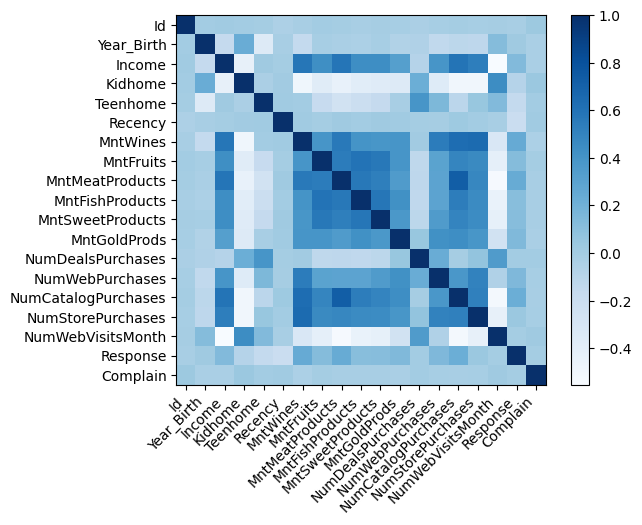

In [7]:
#plotting correlation matrix 
plt.imshow(corr_matrix, cmap='Blues')

#adding colorbar 
plt.colorbar()

#extracting variable names 
variables = []
for i in corr_matrix.columns:
  variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(corr_matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix)), variables)

# Display the plot
plt.show()

In [8]:
# checking balance of classes for all x variables
superstore_data["Response"].value_counts()

0    1906
1     334
Name: Response, dtype: int64

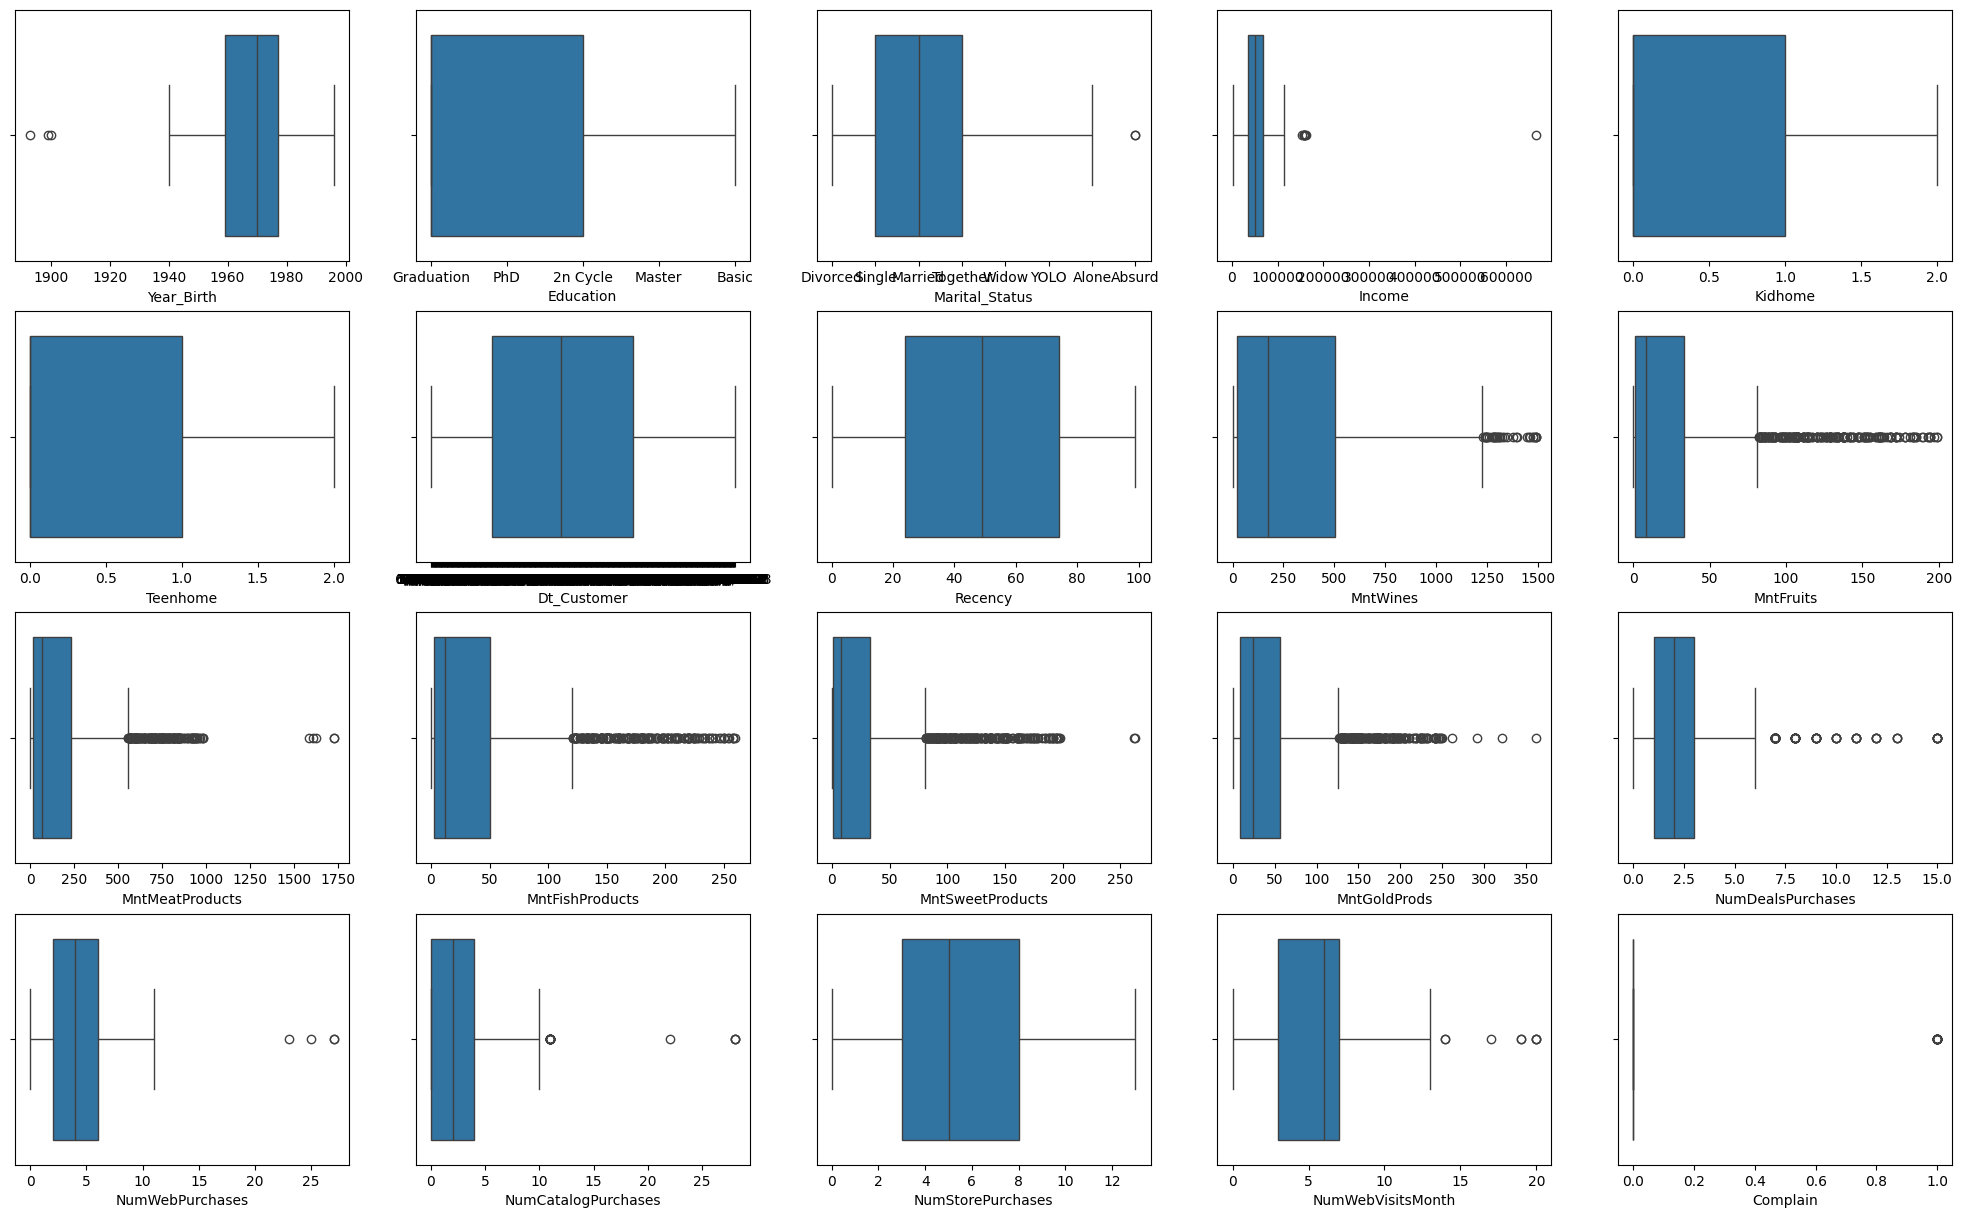

In [9]:
relevant_cols = list(superstore_data.columns)
relevant_cols.remove("Id")
relevant_cols.remove("Response")

ncols = len(relevant_cols)
fig, axes = plt.subplots(4,ncols//4, figsize=(25,15))

for name, ax in zip(relevant_cols, axes.flatten()):
    # print(ax)
    sns.boxplot(x=superstore_data[name], ax=ax)



In [4]:
# function to filter outliers
def filter_outliers(df: pd.DataFrame, column_name: str, min_value, max_value) -> pd.DataFrame:
    """
    Function to filter out outliers for numeric value columns in a df.
    """
    initial_rows = len(df)
    
    df = df.loc[df[column_name] >= min_value]
    df = df.loc[df[column_name] <= max_value]

    final_rows = len(df)

    filtered_out_rows = initial_rows - final_rows
    print(f"Filtered out {filtered_out_rows} rows for column {column_name}")
    
    return df

In [5]:
# function to calculate IV (Information Value) & WOE
def calculate_iv(df: pd.DataFrame, x_col: str, y_col: str) -> float:
    df_subset = df[[x_col, y_col]].copy()

    df_subset.dropna(inplace=True)

    unique_vals = df_subset[x_col].unique()

    good = len(df_subset[df_subset[y_col] == 1])
    bad = len(df_subset[df_subset[y_col] == 0])

    iv = 0
    
    for uv in unique_vals:
        num_goods = len(df_subset[(df_subset[y_col] == 1) & (df_subset[x_col] == uv)])
        num_bads = len(df_subset[(df_subset[y_col] == 0) & (df_subset[x_col] == uv)])

        good_dist = (num_goods/good)
        bad_dist = (num_bads/bad)

        if good_dist == 0 or bad_dist == 0:
            continue
        woe = np.log(good_dist/bad_dist)
        iv += ((good_dist - bad_dist) * woe)

    return woe, iv

* first bin, then calculate woe for bins

In [29]:
# calculate_iv(superstore_data, "Education", "Response")
iv = {}
iv_df = pd.DataFrame(columns=["X", "woe", "iv"])

x_cols = list(superstore_data.columns)
# print(x_cols)
x_cols.remove("Response")
x_cols.remove("Id")

for col in x_cols:
    print(col)
    iv[col] = (calculate_iv(superstore_data, col, "Response"))
    iv_df = iv_df.append({"X": col, "woe": iv[col][0], "iv": iv[col][1]}, ignore_index=True)

iv_df.sort_values(by=["iv"], ascending=False, inplace=True)

iv_df

Year_Birth
Education
Marital_Status
Income
Kidhome
Teenhome
Dt_Customer
Recency
MntWines
MntFruits
MntMeatProducts
MntFishProducts
MntSweetProducts
MntGoldProds
NumDealsPurchases
NumWebPurchases
NumCatalogPurchases
NumStorePurchases
NumWebVisitsMonth
Complain


,X,woe,iv
6,Dt_Customer,2.434768,0.958455
10,MntMeatProducts,1.336156,0.722898
13,MntGoldProds,1.741621,0.678152
8,MntWines,1.741621,0.628966
16,NumCatalogPurchases,1.636261,0.593904
7,Recency,-1.030968,0.572388
12,MntSweetProducts,0.643009,0.567909
11,MntFishProducts,2.434768,0.563103
9,MntFruits,1.048474,0.534249
15,NumWebPurchases,0.760792,0.383338


## Custom Logistic Regression Class

In [25]:
from tqdm import tqdm

def sigmoid_activation(Z):
    return 1 / (1 + np.exp(- Z))

class CustomLogisticRegression:
    def __init__(self, lr = 0.001, num_iter = 100):
        self.lr = lr
        self.num_iter = num_iter

        self.w = None
        self.bias = None

    def fit(self, X, y):
        num_rows, num_features = X.shape

        self.w = np.zeros((num_features, ))
        self.bias = 0

        for num in tqdm(range(self.num_iter)):
            Z = np.dot(X, self.w) + self.bias
            y_cap = sigmoid_activation(Z)

            dw = (1 / num_rows) * np.dot(X.T, (y_cap - y))
            db = (1 / num_rows) * np.sum((y_cap - y))

            self.w = self.w - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X) -> np.ndarray:
        Z_pred = np.dot(X, self.w) + self.bias
        preds = sigmoid_activation(Z_pred)
        preds = np.where(preds > 0.5, 1, 0)
        
        return preds 
        
        
        

In [26]:
# test above class
clg = CustomLogisticRegression(num_iter=1000, lr=0.01)
clg.fit(X_train, y_train)

100%|██████████| 1000/1000 [00:00<00:00, 7843.57it/s]


### Precision
 * TP / (TP + FP)

### Recall
 * TP / (TP + FN)

### F1 Score

 * 2TP / (2TP + FP + FN)

0.7754716981132076
[[189  85]
 [ 34 222]]
precision: 0.7231270358306189
recall: 0.8671875
f1: 0.7886323268206039


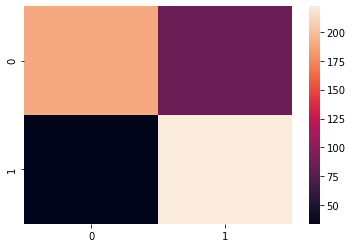

In [27]:
# predictions
custom_preds = clg.predict(X_test)
y_test_pred = list(custom_preds)

# confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)
print(accuracy_score(y_test, y_test_pred))
print(cm)
sns.heatmap(cm)

print(f"precision: {precision_score(y_test, y_test_pred)}")
print(f"recall: {recall_score(y_test, y_test_pred)}")
print(f"f1: {f1_score(y_test, y_test_pred)}")

# Start executing from this cell for a new run

In [12]:
# filter outliers using helper function
filtered_data = superstore_data.copy()

filtered_data = filtered_data.loc[filtered_data["Marital_Status"] != "Absurd"]
filtered_data = filter_outliers(filtered_data, "Year_Birth", 1940, 2000)
filtered_data = filter_outliers(filtered_data, "Income", 0.0, 200000.0)
filtered_data = filter_outliers(filtered_data, "MntWines", 0, 1225)
filtered_data = filter_outliers(filtered_data, "MntFruits", 0, 78)
filtered_data = filter_outliers(filtered_data, "MntMeatProducts", 0, 500)
filtered_data = filter_outliers(filtered_data, "MntFishProducts", 0, 125)
filtered_data = filter_outliers(filtered_data, "MntSweetProducts", 0, 75)
filtered_data = filter_outliers(filtered_data, "MntGoldProds", 0, 125)
filtered_data = filter_outliers(filtered_data, "NumDealsPurchases", 0.0, 6.5)
filtered_data = filter_outliers(filtered_data, "NumWebPurchases", 0, 10)
filtered_data = filter_outliers(filtered_data, "NumCatalogPurchases", 0, 10)
filtered_data = filter_outliers(filtered_data, "NumWebVisitsMonth", 0, 15)

print(len(filtered_data))
print(filtered_data.isna().sum())
print(len(filtered_data))


Filtered out 3 rows for column Year_Birth
Filtered out 25 rows for column Income
Filtered out 35 rows for column MntWines
Filtered out 242 rows for column MntFruits
Filtered out 134 rows for column MntMeatProducts
Filtered out 71 rows for column MntFishProducts
Filtered out 75 rows for column MntSweetProducts
Filtered out 93 rows for column MntGoldProds
Filtered out 62 rows for column NumDealsPurchases
Filtered out 18 rows for column NumWebPurchases
Filtered out 4 rows for column NumCatalogPurchases
Filtered out 2 rows for column NumWebVisitsMonth
1474
Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurcha

In [13]:
print(filtered_data.dtypes)

categorical_cols = ["Education", "Marital_Status"]

# convert categorical columns to numerical
for col in categorical_cols:
    filtered_data[col] = pd.factorize(filtered_data[col])[0]

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object


## Binning of Numerical Cols

In [14]:
# function for easy binning
def bin_column(df_input: pd.DataFrame, column_name: str, num_bins: int, min_val = None, max_val = None):
    df = df_input.copy()
    
    if min_val is None:
        min_val = float(df[column_name].min())
    if max_val is None:
        max_val = float(df[column_name].max())

    print(f"min value in col: {min_val}")
    print(f"max value in col: {max_val}")
    
    col_range = max_val - min_val
    len_of_bin = (max_val / num_bins) + 1
    # print(len_of_bin)
    bins = [len_of_bin*num_bin for num_bin in range(num_bins + 1)]
    # print(bins)
    df[column_name] = pd.cut(df[column_name], bins)
    # print(df[column_name].isna().sum())
    # print(df[column_name].value_counts())
    # print(df[column_name].factorize()[0])
    df[column_name] = df[column_name].factorize()[0]
    print(df[column_name].value_counts())
    return df


# Algorithmic binning (bins not manually specified, each bins of n-length)
filtered_data = bin_column(filtered_data, "Income", 6)
filtered_data = bin_column(filtered_data, "MntWines", 6)
# filtered_data = bin_column(filtered_data, "MntFruits", 6)
# filtered_data = bin_column(filtered_data, "MntFishProducts", 6)
# filtered_data = bin_column(filtered_data, "MntSweetProducts", 6)
# filtered_data = bin_column(filtered_data, "MntMeatProducts", 6)
# filtered_data = bin_column(filtered_data, "MntGoldProds", 6)

min value in col: 3502.0
max value in col: 162397.0
1    804
0    357
2    284
3     25
4      4
Name: Income, dtype: int64
min value in col: 0.0
max value in col: 1218.0
 1    1071
 2     160
 0     103
 3      65
 4      43
 5      19
-1      13
Name: MntWines, dtype: int64


In [15]:
from sklearn.preprocessing import StandardScaler, Normalizer
from imblearn.over_sampling import SMOTE

# using SMOTE for imbalanced classes
sm = SMOTE(random_state=42)

scaler = StandardScaler()

# Create X and y (features and response)
x_cols = list(superstore_data.columns)
x_cols.remove("Response")
x_cols.remove("Dt_Customer")
# x_cols.remove("MntMeatProducts")
# x_cols.remove("MntGoldProds")

# subset cols and scale data
X = filtered_data[x_cols]
X = scaler.fit_transform(X)

y = filtered_data[["Response"]]
X, y = sm.fit_resample(X, y)

In [16]:
print(y.value_counts())
y = y.to_numpy().ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train Set Size: {len(X_train)}")
print(f"Test Set Size: {len(X_test)}")

Response
0           1325
1           1325
dtype: int64
Train Set Size: 2120
Test Set Size: 530


In [238]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [439]:
# predict on Test Set
predictions = clf.predict(X_test)

score = clf.score(X_test, y_test)
print("Accuracy: \n")
print(score)

Accuracy: 

0.8018867924528302


[[214  60]
 [ 45 211]]
precision: 0.7785977859778598
recall: 0.82421875
f1: 0.8007590132827325


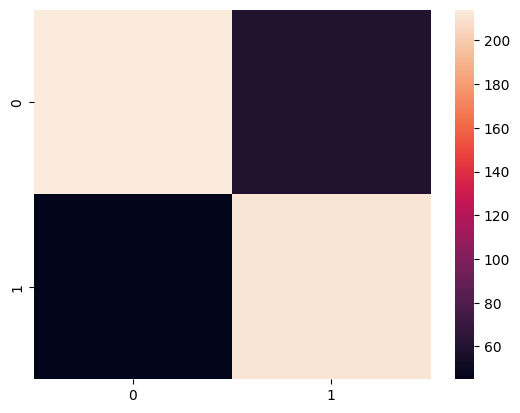

In [443]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

sns.heatmap(cm)

print(f"precision: {precision_score(y_test, predictions)}")
print(f"recall: {recall_score(y_test, predictions)}")
print(f"f1: {f1_score(y_test, predictions)}")